<a href="https://colab.research.google.com/github/lakummahesh/Unsupervised-ML-Capstone-Project-Netflix-Movies-and-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/Unsupervised-ML-Capstone-Project-Netflix-Movies-and-TV-Shows-Clustering-Mahesh-Lakum/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
data = pd.read_csv(path)

In [4]:
df = data.copy()

In [5]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [6]:
df.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
df.shape

(7787, 12)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
# To check for duplicate entries.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

Here, show_id and title have count equal to the number of total rows. Hence, there are no duplicate entries in this dataset.

In [12]:
df['director'].fillna('Data unavailable', inplace=True)
df['cast'].fillna('Data unavailable', inplace=True)
df['country'].fillna('Data unavailable', inplace=True)
df.dropna(subset = ['date_added'], inplace=True)
df.dropna(subset = ['rating'], inplace=True)

In [13]:
df.shape

(7770, 12)

In [14]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Hence, we replaced the null data in the 'director', 'cast' and 'country'   columns by 'Data unavailable' and dropped the seven null entries in 'rating' and 10 null entries in 'date_added' column.

In [15]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

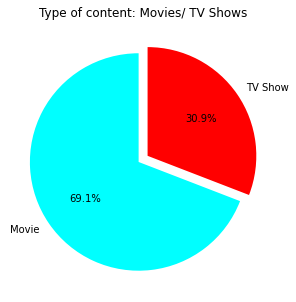

In [16]:
#Firstly looking at the percentage of types of content in the data. i.e. movies and TV shows.
plt.figure(figsize=(5,5))
plt.title('Type of content: Movies/ TV Shows')
plt.pie(df['type'].value_counts(), explode=(0.05,0.05),
        labels = df['type'].value_counts().index, colors=['cyan','red'],
        autopct='%1.1f%%', startangle=90)
plt.show()

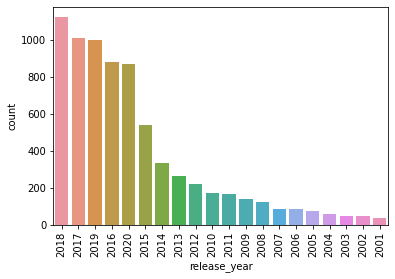

In [17]:
#plotting the countplot of number of movies and tv shows as per release year
plot_release_year = sns.countplot(x = 'release_year',
              data = df, order = df['release_year'].value_counts().index[:20])
plot_release_year.set_xticklabels(plot_release_year.get_xticklabels(), rotation=90)
plt.show()

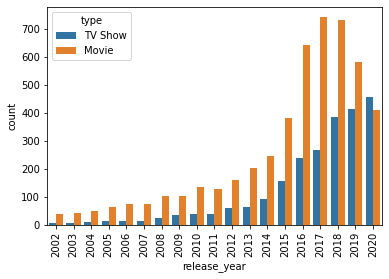

In [18]:
#plotting the countplot of number of movies and tv shows as per release year
year_order = list(range(0,2022))
plot_release_year = sns.countplot(data = df, x = 'release_year', hue = 'type',
                                  order = year_order[-20:-1])
plot_release_year.set_xticklabels(plot_release_year.get_xticklabels(), rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


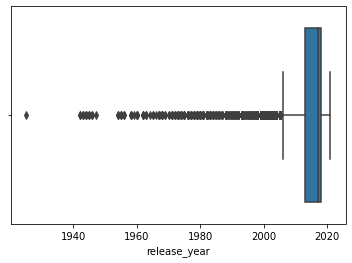

In [19]:
#box plot graph to show the outliers on release_year column
sns.boxplot(df.release_year)

As we have seen earlier, before 2014 the production growth for Movies & Tv Shows were very less ,that's why here it's showing those values(release_year less than 2009) as outliers.

In [20]:
df['date_added'].value_counts

<bound method IndexOpsMixin.value_counts of 0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7782      October 19, 2020
7783         March 2, 2019
7784    September 25, 2020
7785      October 31, 2020
7786         March 1, 2020
Name: date_added, Length: 7770, dtype: object>

In [21]:
df['added_year'] = pd.DatetimeIndex(df['date_added']).year
df['added_month'] = pd.DatetimeIndex(df['date_added']).month
df['added_day'] = pd.DatetimeIndex(df['date_added']).day
df['added_weekday'] = pd.DatetimeIndex(df['date_added']).weekday

In [22]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,added_weekday
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,10,19,0
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,2,5
7784,s7785,Movie,Zulu Man in Japan,Data unavailable,Nasty C,Data unavailable,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,25,4
7785,s7786,TV Show,Zumbo's Just Desserts,Data unavailable,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,31,5
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Data unavailable,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3,1,6


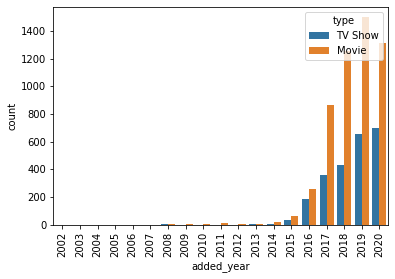

In [23]:
#plotting the countplot of number of movies and tv shows as per added year
year_order = list(range(0,2022))
plot_added_year = sns.countplot(data = df, x = 'added_year', hue = 'type',
                                  order = year_order[-20:-1])
plot_added_year.set_xticklabels(plot_added_year.get_xticklabels(), rotation=90)
plt.show()

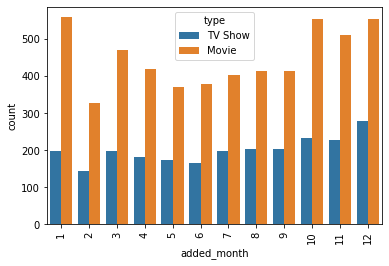

In [24]:
#plotting the countplot of number of movies and tv shows as per added monthwise
# month_order = list(range(0,2022))
plot_added_month = sns.countplot(data = df, x = 'added_month', hue = 'type')
                                  # order = year_order[-20:-1])
plot_added_month.set_xticklabels(plot_added_month.get_xticklabels(), rotation=90)
plt.show()

In [25]:
df.country.value_counts()

United States                                                   2546
India                                                            923
Data unavailable                                                 505
United Kingdom                                                   396
Japan                                                            224
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

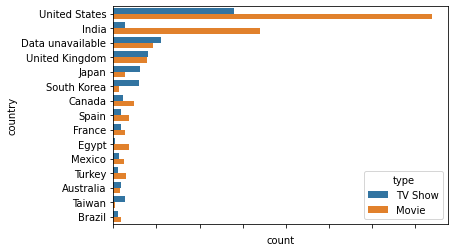

In [26]:
#plotting the countplot of top countries producing the movies and tv shows
list_order = df.country.value_counts().index[:15]
plot_country = sns.countplot(data = df, y = 'country', hue = 'type',
                                  order = list_order)
plot_country.set_xticklabels(plot_country.get_xticklabels(), rotation=90)
plt.show()

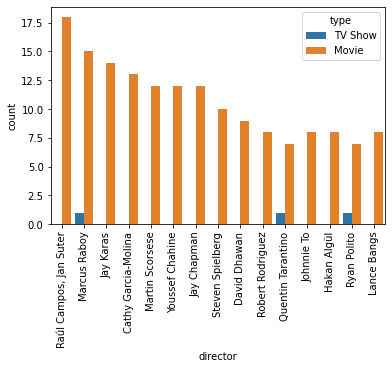

In [27]:
#plotting the countplot of top directors producing the movies and tv shows
#Here, we have not seperated the director names  inorder to keep the data intact.
list_order1 = df.director.value_counts().index[1:16]
plot_director = sns.countplot(data = df, x = 'director', hue = 'type',
                                  order = list_order1)
plot_director.set_xticklabels(plot_director.get_xticklabels(), rotation=90)
plt.show()

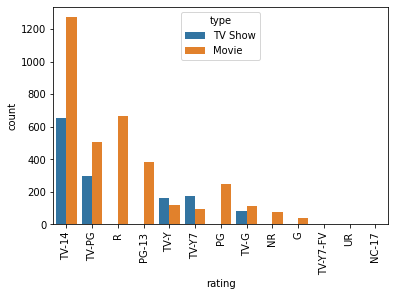

In [28]:
#plotting the countplot of top directors producing the movies and tv shows
#Here, we have not seperated the director names  inorder to keep the data intact.
list_order2 = df.rating.value_counts().index[1:16]
plot_rating = sns.countplot(data = df, x = 'rating', hue = 'type',
                                  order = list_order2)
plot_rating.set_xticklabels(plot_rating.get_xticklabels(), rotation=90)
plt.show()

TV Shows do no have ratings: 'R' & 'PG-13'
The maximum occuring ratings is 'TV-14' & 'TV-PG'
'TV-Y7-FV', 'UR' and 'NC-17' seem to have less or almost no movies and TV shows listed with them.
Meaning of these ratings:
TV-14 -> This program contains material that most parents would find unsuitable for children under 14 years of age.
TV-PG -> This program contains material that parents may find unsuitable for younger children.
R -> Restricted. Under 17 requires accompanying parent or adult guardian.
PG-13 -> Parental guidance for children under 13.

Genres

In [29]:
df['Listed_in'] = df['listed_in'].apply(lambda x : x.split(',')) 

In [30]:
list_genre = []
for i in df['Listed_in']:
  list_genre +=i                                                                     

for i in range(len(list_genre)): 
  list_genre[i] = list_genre[i].strip()

genres_dict = {}
for genre in  list_genre:
  if genre in genres_dict:
    genres_dict[genre] +=1
  else:
    genres_dict[genre] = 1

genres_dict = dict(sorted(genres_dict.items(), key=lambda item: item[1],reverse=True))

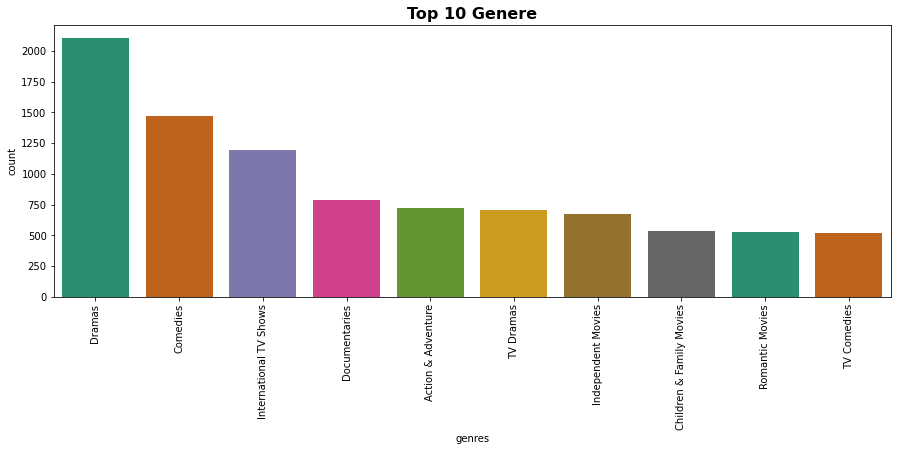

In [31]:
#top 10 genres on netflix
df_genre_count = pd.DataFrame(genres_dict.values(),genres_dict.keys()).reset_index().rename(columns={'index':'genres', 0:'count'})[1:11]
plt.figure(figsize=(15,5))
sns.barplot(x='genres',y='count',data=df_genre_count,palette="Dark2")
plt.title("Top 10 Genere",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

Drama is the most popular genre followed by comedy.

In [32]:
#creating a column for no.of categories
df['no_of_category'] = df['Listed_in'] .apply(lambda x : len(x))

In [33]:
df[['listed_in','no_of_category']].head()

,listed_in,no_of_category
0,"International TV Shows, TV Dramas, TV Sci-Fi &...",3
1,"Dramas, International Movies",2
2,"Horror Movies, International Movies",2
3,"Action & Adventure, Independent Movies, Sci-Fi...",3
4,Dramas,1


In [34]:
#printing unique values
df.no_of_category.unique()

array([3, 2, 1])

In [35]:
#total value count of new category
df.no_of_category.value_counts()

3    3295
2    2682
1    1793
Name: no_of_category, dtype: int64

Text(0, 0.5, 'Count')

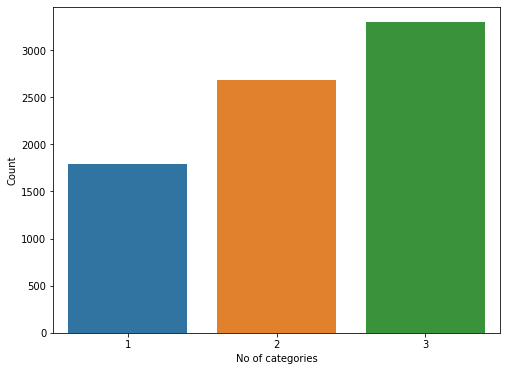

In [36]:
#Countplot of no_of_category
plt.figure(figsize = (8,6))
sns.countplot(data=df,x='no_of_category')
plt.xlabel("No of categories")
plt.ylabel("Count")

Top actors from the movies:

In [37]:
df['cast'] = df['cast'].apply(lambda x : x.split(','))

In [38]:
cast_lst = []
for i in df['cast']:                                                              #list of actors
  cast_lst +=i                                                                     

for i in range(len(cast_lst)): 
  cast_lst[i] = cast_lst[i].strip()                                # strip will remove whitespace from the beginning and end of a string                                                        

cast_dict = {}
for actor in cast_lst:                                                                     #calculating frequency of actors
  if actor in cast_dict:
    cast_dict[actor] +=1
  else:
    cast_dict[actor] = 1

cast_dict = dict(sorted(cast_dict.items(), key=lambda item: item[1],reverse=True))

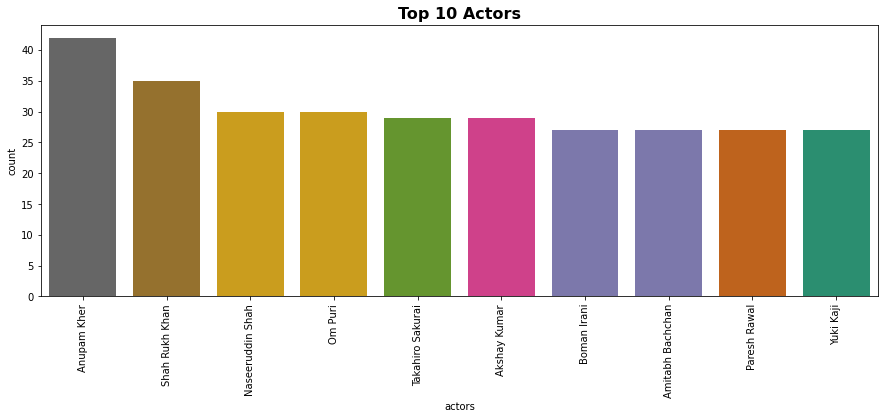

In [39]:
#top 10 actors
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().rename(columns={'index':'actors', 0:'count'})[1:11]
plt.figure(figsize=(15,5))
sns.barplot(x='actors',y='count',data=df_cast_count,palette="Dark2_r")
plt.title("Top 10 Actors",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

Movie Duration distribution

In [40]:
movie_duration = df.loc[df['type'] == 'Movie',['type','duration']]               #filter movie and their length
movie_duration['duration'] = movie_duration['duration'].apply(lambda x : int(x.split()[0])) 

Text(0.5, 1.0, 'Movie Duration')

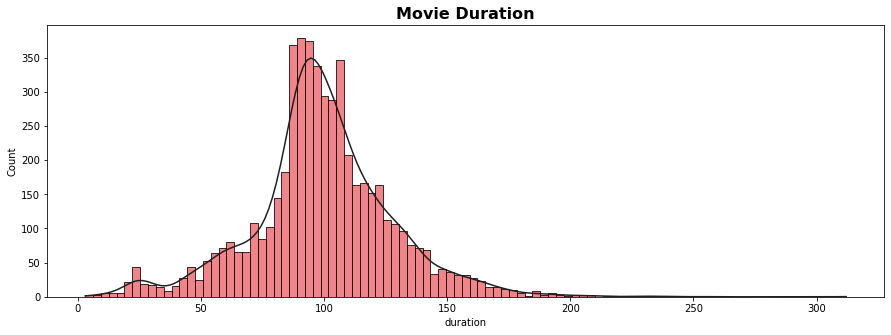

In [41]:
#movie lenth distribution
plt.figure(figsize=(15,5))
ax = sns.histplot(x='duration',data=movie_duration,kde=True,color="#e50914")
ax.lines[0].set_color('#221f1f')
plt.title("Movie Duration",size='16',fontweight="bold")

Observations:

Above histogram plot, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes which seems to make sense.
Most content are about 70 to 120 min duration for movies.

TV Show Seasons distribution

In [42]:
tvshow_seasons = df.loc[df['type'] == 'TV Show',['type','duration']]                #filter tvshow and their seasons
tvshow_seasons['duration'] = tvshow_seasons['duration'].apply(lambda x : int(x.split()[0]))

In [43]:
tvshow_seasons['duration'].value_counts().reset_index().rename(columns={'index':'seasons','duration':'count'})

,seasons,count
0,1,1606
1,2,378
2,3,183
3,4,86
4,5,57
5,6,30
6,7,19
7,8,18
8,9,8
9,10,5


Text(0.5, 0, 'Seasons')

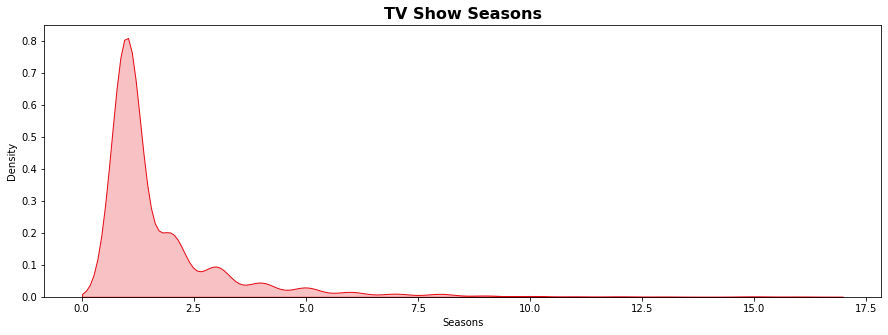

In [44]:
#TV show seasons distribution
plt.figure(figsize=(15,5))
ax = sns.kdeplot(x='duration',data=tvshow_seasons,color="#e50914",shade=True)
# ax = sns.histplot(x='duration',data=tvshow_seasons,kde=True,color="#e50914")
# ax.lines[0].set_color('#221f1f')
plt.title("TV Show Seasons",size='16',fontweight="bold")
plt.xlabel('Seasons')

Observation:

From above we see that Netflix TV shows on the other hand seems to be heavily skewed to the right or positively skewed where the majority of shows only have 1 season.

Content in India

In [45]:
#first 25 content in india
content_in_india = df.loc[(df['country']=='India') & (df['director']!='Data unavailable') ,['country','type','director',
                                                                                        'title','duration','release_year']].iloc[:25]

In [46]:
#visualization
import plotly.express as px
fig = px.treemap(content_in_india,path=['country','director'],color='director',
                 hover_data=['title','duration','type','release_year'],color_continuous_scale='Purples')
fig.show()

wordcloud to get an overview of Netflix titles

In [47]:
import matplotlib
from wordcloud import WordCloud,STOPWORDS

In [48]:
#title string
text = str(list(df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

In [49]:
# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

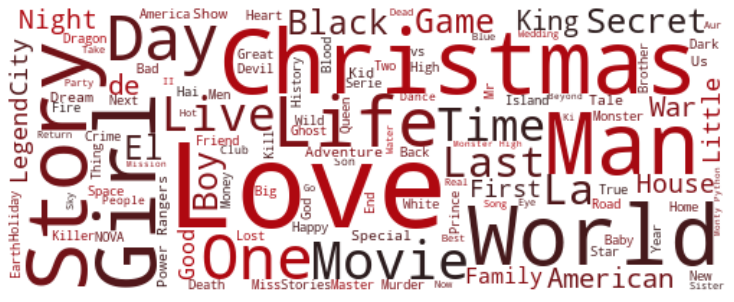

In [50]:
# Create stopword list:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color = 'white', width = 500,  height = 200,colormap=cmap, 
                      max_words = 120).generate(text)

plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Observations:

It seems like words like "Love", "Man", "World", "Story" , "Christmas" are very common in titles.

I have suprised to see "Christmas" ocuured so many time . The reason maybe those movies released on the month of december, but I don't have any information about the release month of movies that's why I am not able to check my hypothesis.

Natural Language Processing(NLP)
NLP is a field in machine learning with the ability of a computer to understand, analyze, manipulate, and potentially generate human language.

1. Analysis on "description"

In [51]:
#discription category of 1st row
df.description[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

Removing punctuations

In [52]:
#creating a function for removing punctuation 
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [53]:
#removing punctuation from discription column
df['description'] = df['description'].apply(remove_punctuation)
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,added_weekday,Listed_in,no_of_category
0,s1,TV Show,3%,Data unavailable,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,4,"[International TV Shows, TV Dramas, TV Sci-F...",3
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,4,"[Dramas, International Movies]",2


Removing stopwords

In [54]:
#import nltk library for stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [55]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
#print number of stopwords
print("Number of stopwords in english : ", len(sw))
print('-'*50)
# displaying the stopwords
print('STOP WORDS: ',*sw)

Number of stopwords in english :  179
--------------------------------------------------
STOP WORDS:  i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't we

In [56]:
#function for removing stopwords
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [57]:
#removing stopwords from discription
df['description'] = df['description'].apply( remove_stopwords )
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,added_weekday,Listed_in,no_of_category
0,s1,TV Show,3%,Data unavailable,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,2020,8,14,4,"[International TV Shows, TV Dramas, TV Sci-F...",3
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,2016,12,23,4,"[Dramas, International Movies]",2


Now all the punctutations and stopwords are removed from discription column.

CountVectorizer
CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis).

In [58]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [59]:
dictionary = dict(dictionary)
# print(dictionary)

Creating a new DataFrame vocab_before_stemming

In [60]:
# Store the count in panadas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Word": dictionary.keys() ,
                                      "count" :dictionary.values()})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [61]:
#print stemming word count
vocab_before_stemming.head(4)

,Word,count
18845,şeref,19585
10379,ōarai,19584
12367,łukasz,19583
11090,überelite,19582


In [62]:
#show top 20 stemming column
vocab_before_stemming.head(20).T

,18845,10379,12367,11090,11662,13273,6576,18183,10417,9859,19547,6528,19582,16402,7184,18385,19572,19579,10282,18059
Word,şeref,ōarai,łukasz,überelite,über,ömer,émile,ángel,álvaro,álex,zé,zurich,zumbo,zulu,zuhu,zuckerberg,zoé,zozo,zoya,zorro
count,19585,19584,19583,19582,19581,19580,19579,19578,19577,19576,19575,19574,19573,19572,19571,19570,19569,19568,19567,19566


In [63]:
#show bottom 4 stemming table
vocab_before_stemming.tail(4)

,Word,count
639,100,3
7608,10,2
7954,009,1
6859,007,0


Most occurred words

In [64]:
#top15 occured vocab
top15_most_occurred_vocab = vocab_before_stemming.head(15)

In [65]:
#print top 15 most occured words
top15_most_occurred_words = top15_most_occurred_vocab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelite', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [66]:
#count the values of top 15 most occured words
top15_most_occurred_word_count = top15_most_occurred_vocab['count'].values
top15_most_occurred_word_count

array([19585, 19584, 19583, 19582, 19581, 19580, 19579, 19578, 19577,
       19576, 19575, 19574, 19573, 19572, 19571])

<BarContainer object of 15 artists>

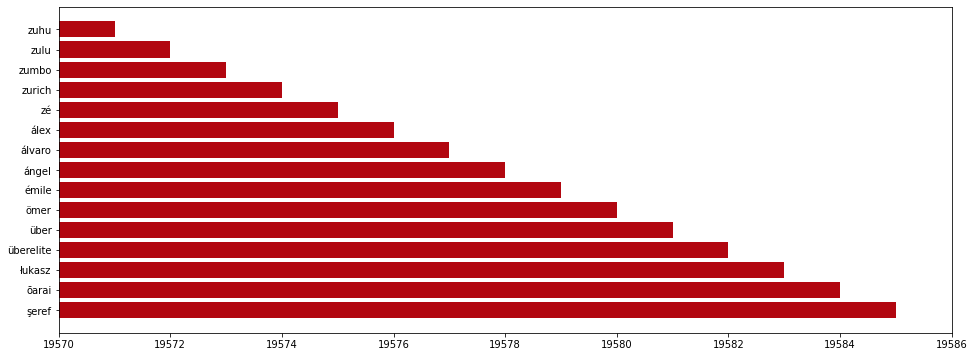

In [67]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(19570, 19586)
plt.barh(top15_most_occurred_words ,top15_most_occurred_word_count,color="#b20710")

SnowballStemmer
It is the process of reducing the word to its word stem that affixes to suffixes and prefixes or to roots of words known as a lemma. In simple words stemming is reducing a word to its base word or stem in such a way that the words of similar kind lie under a common stem. For example – The words care, cared and caring lie under the same stem ‘care’. Stemming is important in natural language processing(NLP).

In [68]:
from nltk.stem.snowball import SnowballStemmer
# Create an object of stemming function
stemmer = SnowballStemmer("english")

In [69]:
def Apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [70]:
#Stemming for description
df['description'] = df['description'].apply( Apply_stemming )
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,added_weekday,Listed_in,no_of_category
0,s1,TV Show,3%,Data unavailable,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,2020,8,14,4,"[International TV Shows, TV Dramas, TV Sci-F...",3
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2016,12,23,4,"[Dramas, International Movies]",2


Tf-idf Vectorizer(after stemming)
Term Frequency (TF) - How many times a particular word appears in a single document.
Inverse Document Frequency (IDF) - It is calculated by taking the log of {number of docs in your corpus divided by the number of docs in which this term appears}. This takes care of words which are present rarely across the corpus.

In [71]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [72]:
dictionary = dict(dictionary)
# print(dictionary)

In [73]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": dictionary.keys() ,
                                      "count" :dictionary.values()})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

Most occurred words

In [74]:
#top15 occured vocab
top15_most_occurred_vocab = vocab_after_stemming.head(15)

In [75]:
top15_most_occurred_words = top15_most_occurred_vocab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelit', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [76]:
top15_most_occurred_word_count = top15_most_occurred_vocab['count'].values
top15_most_occurred_word_count

array([14233, 14232, 14231, 14230, 14229, 14228, 14227, 14226, 14225,
       14224, 14223, 14222, 14221, 14220, 14219])

<BarContainer object of 15 artists>

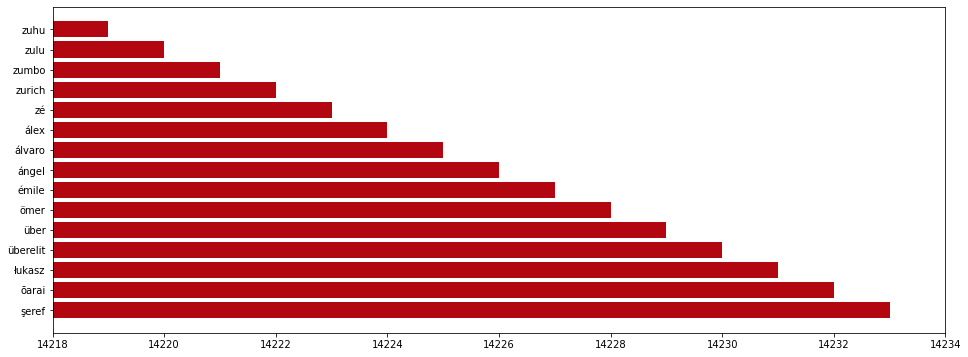

In [77]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(14218, 14234)
plt.barh(top15_most_occurred_words ,top15_most_occurred_word_count ,color="#b20710")

Adding a new column length which will contain length of description

In [78]:
#creating new column name length
df['Length(description)'] = df['description'].apply(lambda x: len(x))
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,added_weekday,Listed_in,no_of_category,Length(description)
0,s1,TV Show,3%,Data unavailable,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,2020,8,14,4,"[International TV Shows, TV Dramas, TV Sci-F...",3,82
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2016,12,23,4,"[Dramas, International Movies]",2,88
2,s3,Movie,23:59,Gilbert Chan,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2018,12,20,3,"[Horror Movies, International Movies]",2,102


In [79]:
#print 1st row content from discription 
df.description[0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

2. Analysis on "listed_in"
Removing punctuation and stopwords

In [80]:
#removing punctuation and stop words
df['listed_in'] = df['listed_in'].apply(remove_punctuation)
df['listed_in'] = df['listed_in'].apply( remove_stopwords )
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,added_weekday,Listed_in,no_of_category,Length(description)
0,s1,TV Show,3%,Data unavailable,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,international tv shows tv dramas tv scifi fantasy,futur elit inhabit island paradis far crowd sl...,2020,8,14,4,"[International TV Shows, TV Dramas, TV Sci-F...",3,82
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,"December 23, 2016",2016,TV-MA,93 min,dramas international movies,devast earthquak hit mexico citi trap survivor...,2016,12,23,4,"[Dramas, International Movies]",2,88


CountVectorizer

In [81]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['listed_in'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [82]:
dictionary = dict(dictionary)
# print(dictionary)

Creating a new DataFrame vocab_before_stemming

In [83]:
# Store the count in panadas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Word": dictionary.keys() ,
                                      "count" :dictionary.values()})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [84]:
#print stemming word count
vocab_before_stemming.head(4)

,Word,count
1,tv,41
12,thrillers,40
40,teen,39
39,talk,38


In [85]:
#show top 20 stemming column
vocab_before_stemming.head(20).T

,1,12,40,39,37,16,30,32,2,19,4,22,21,20,23,11,27,26,6,28
Word,tv,thrillers,teen,talk,standup,sports,spirituality,spanishlanguage,shows,series,scifi,science,romantic,reality,nature,mysteries,musicals,music,movies,lgbtq
count,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22


In [86]:
#show bottom 4 stemming table
vocab_before_stemming.tail(4)

,Word,count
24,british,3
18,anime,2
9,adventure,1
8,action,0


Most occurred words

In [87]:
# variable for top 15 most occured vocab in listed_in
top15_most_ocurred_vocab_listed_in = vocab_before_stemming.head(15)

In [88]:
#top 15 most occured vocab in listed_in
top15_most_ocurred_words_listed_in = top15_most_ocurred_vocab_listed_in.Word.values 
top15_most_ocurred_words_listed_in

array(['tv', 'thrillers', 'teen', 'talk', 'standup', 'sports',
       'spirituality', 'spanishlanguage', 'shows', 'series', 'scifi',
       'science', 'romantic', 'reality', 'nature'], dtype=object)

In [89]:
#print top 15 most occured vocab count from listed_in
top15_most_occurred_words_in_listed_in_count = top15_most_ocurred_vocab_listed_in['count'].values 
top15_most_occurred_words_in_listed_in_count

array([41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27])

<BarContainer object of 15 artists>

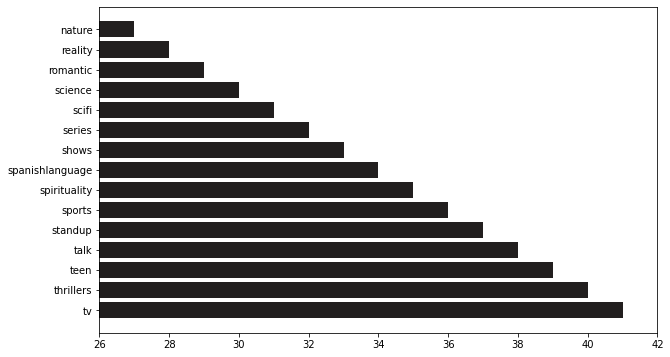

In [90]:
#bar plot for top 15 words from listed_in
plt.figure( figsize = ( 10,6 ))
plt.xlim(26, 42 )
plt.barh(top15_most_ocurred_words_listed_in , top15_most_occurred_words_in_listed_in_count,color="#221f1f")

SnowballStemmer

In [91]:
#Stemming for description
df['listed_in'] = df['listed_in'].apply( Apply_stemming )
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,added_weekday,Listed_in,no_of_category,Length(description)
0,s1,TV Show,3%,Data unavailable,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,2020,8,14,4,"[International TV Shows, TV Dramas, TV Sci-F...",3,82
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,"December 23, 2016",2016,TV-MA,93 min,drama intern movi,devast earthquak hit mexico citi trap survivor...,2016,12,23,4,"[Dramas, International Movies]",2,88
2,s3,Movie,23:59,Gilbert Chan,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Singapore,"December 20, 2018",2011,R,78 min,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2018,12,20,3,"[Horror Movies, International Movies]",2,102


Tf-idf Vectorizer(after stemming)

In [92]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['listed_in'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [93]:
#print dictionary variable 
dictionary = dict(dictionary)
# print(dictionary)

In [94]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming_listed_in = pd.DataFrame({"Word": dictionary.keys() ,
                                      "count" :dictionary.values()})
# Sort the dataframe
vocab_after_stemming_listed_in = vocab_after_stemming_listed_in.sort_values("count" ,ascending=False)

Most occurred words

In [95]:
#top15 occured vocab
top15_most_occurred_vocab_listed_in = vocab_after_stemming_listed_in.head(15)

In [96]:
top15_most_occurred_vocab_listed_in_word = top15_most_occurred_vocab_listed_in.Word.values 
top15_most_occurred_vocab_listed_in_word

array(['tv', 'thriller', 'teen', 'talk', 'standup', 'sport', 'spiritu',
       'spanishlanguag', 'show', 'seri', 'scifi', 'scienc', 'romant',
       'realiti', 'natur'], dtype=object)

In [97]:
top15_most_occurred_vocab_listed_in_count = top15_most_occurred_vocab_listed_in['count'].values
top15_most_occurred_vocab_listed_in_count

array([39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25])

<BarContainer object of 15 artists>

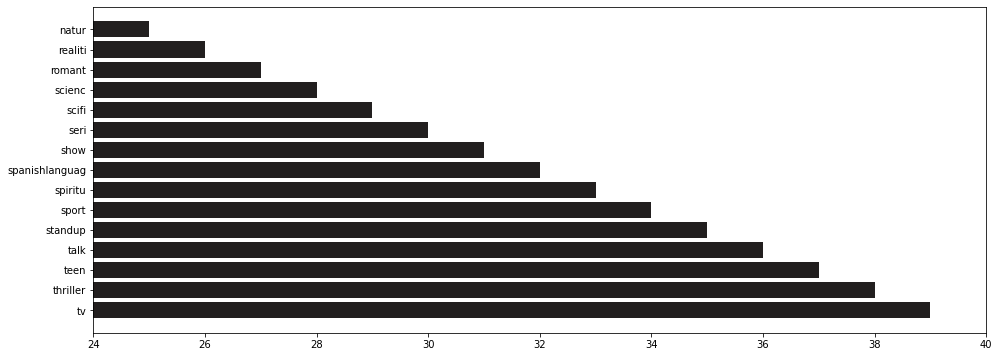

In [98]:
#bar graph after stemming of listed_in category
plt.figure( figsize = ( 16,6 ))
plt.xlim(24, 40 )
plt.barh(top15_most_occurred_vocab_listed_in_word , top15_most_occurred_vocab_listed_in_count,color="#221f1f")

Adding a new column length which will contain length of listed_in

In [99]:
#new column for listed_in length
df['Length(listed-in)'] = df['listed_in'].apply(lambda x: len(x))
df[['description', 'Length(description)', 'listed_in' ,'Length(listed-in)' ]].head(3)

,description,Length(description),listed_in,Length(listed-in)
0,futur elit inhabit island paradis far crowd sl...,82,intern tv show tv drama tv scifi fantasi,40
1,devast earthquak hit mexico citi trap survivor...,88,drama intern movi,17
2,armi recruit found dead fellow soldier forc co...,102,horror movi intern movi,23


Applying Clustering Algorithms

In [100]:
#features taking for clustering
X_features_rec = df[['no_of_category' ,'Length(description)','Length(listed-in)']]
X_features_rec.describe()  

,no_of_category,Length(description),Length(listed-in)
count,7770.000000,7770.000000,7770.000000
mean,2.193308,93.012484,24.342085
std,0.785836,10.775430,10.677661
min,1.000000,25.000000,4.000000
25%,2.000000,87.000000,17.000000
50%,2.000000,93.000000,24.000000
75%,3.000000,100.000000,32.000000
max,3.000000,185.000000,62.000000


In [101]:
from sklearn import preprocessing
#scaling x features
stdscaler = preprocessing.StandardScaler()
X_rescale=stdscaler.fit_transform(X_features_rec)
X=X_rescale

K-MEANS clustering

In [102]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [103]:
#store silhouette score corresponding no. of clusters
no_cluster_silhouette_score = {}

For n_clusters = 2 The average silhouette_score is : 0.42843328899854627
For n_clusters = 3 The average silhouette_score is : 0.3832991558393045
For n_clusters = 4 The average silhouette_score is : 0.37431547662296216
For n_clusters = 5 The average silhouette_score is : 0.3720843918336816
For n_clusters = 6 The average silhouette_score is : 0.3683935727757619
For n_clusters = 7 The average silhouette_score is : 0.3759188611985892
For n_clusters = 8 The average silhouette_score is : 0.3529435800136665
For n_clusters = 9 The average silhouette_score is : 0.37355481904677795
For n_clusters = 10 The average silhouette_score is : 0.36466585189849926
For n_clusters = 11 The average silhouette_score is : 0.3556771542933465
For n_clusters = 12 The average silhouette_score is : 0.354922889695617
For n_clusters = 13 The average silhouette_score is : 0.3510103258811644
For n_clusters = 14 The average silhouette_score is : 0.3479317051389534
For n_clusters = 15 The average silhouette_score is : 0.

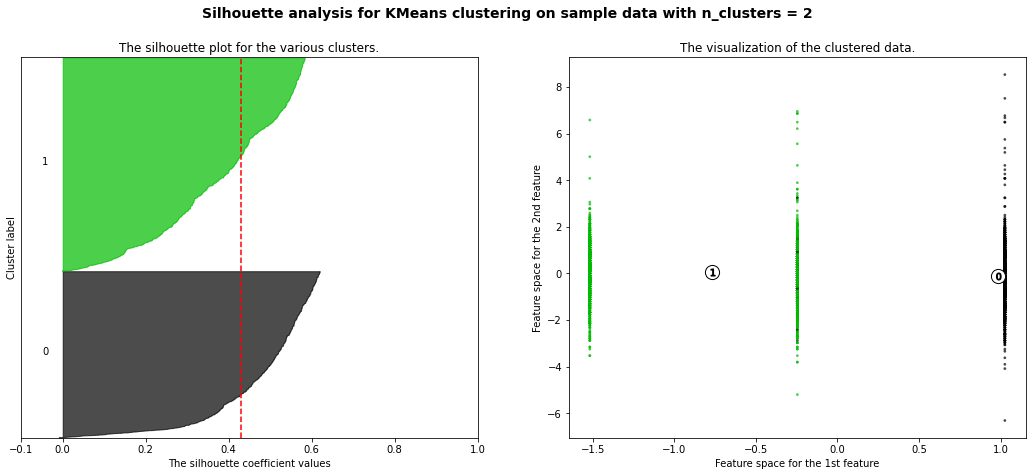

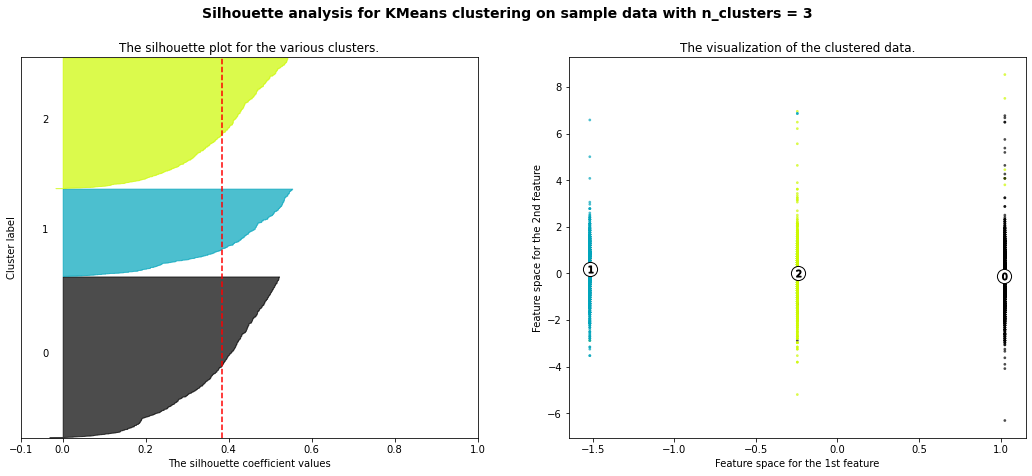

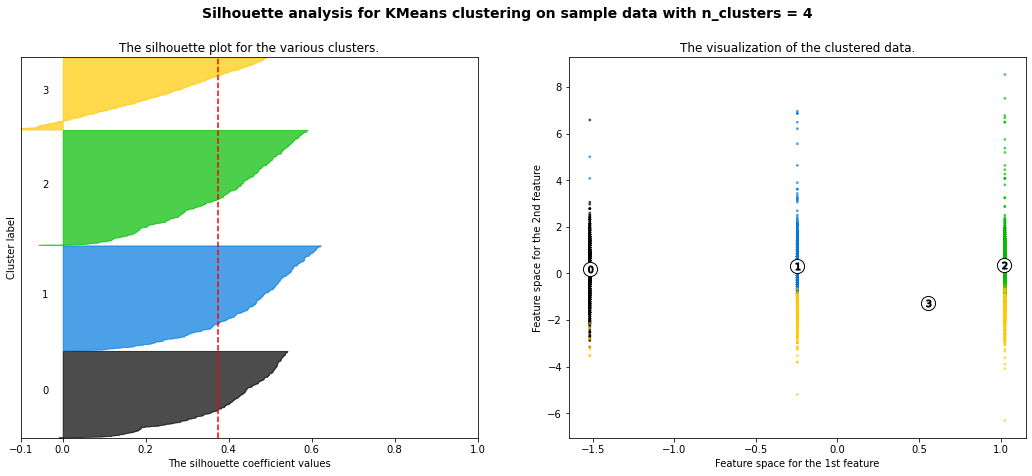

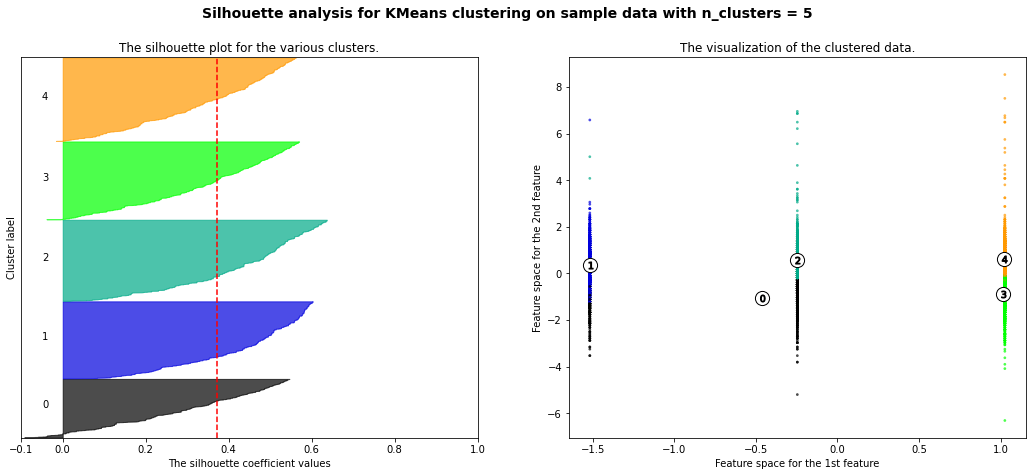

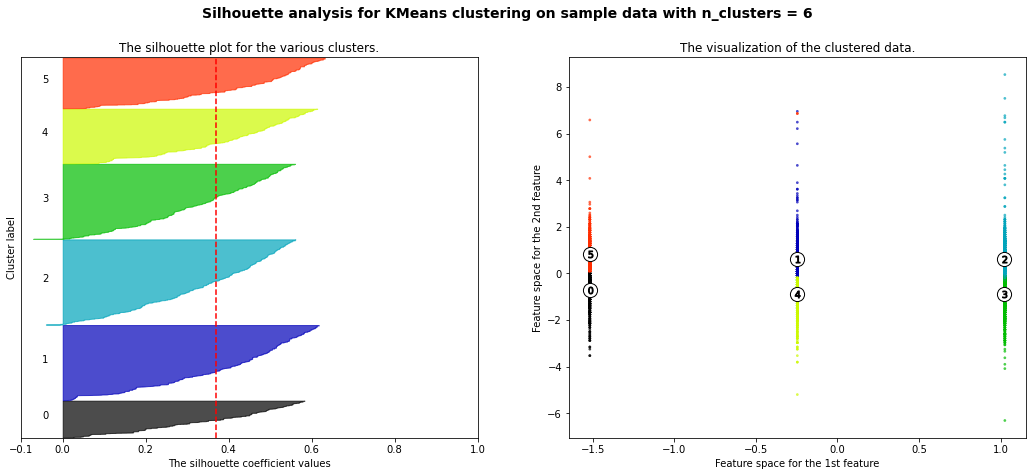

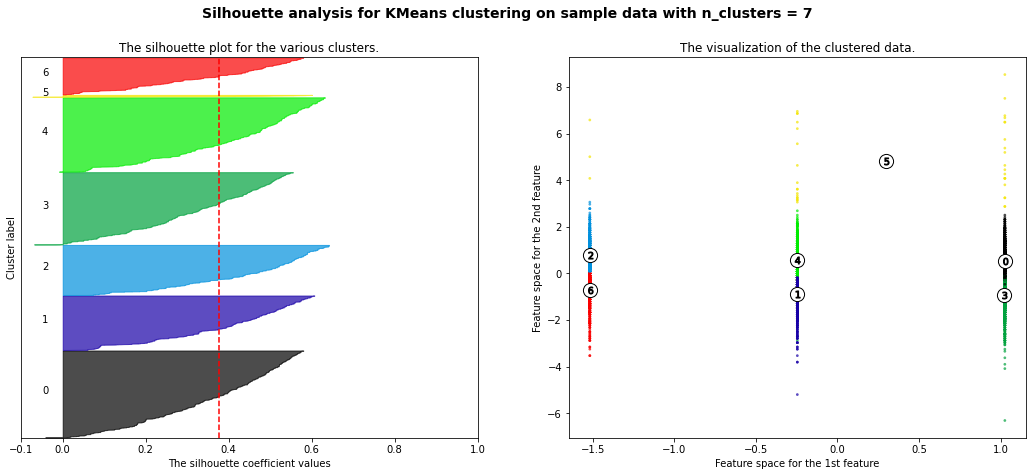

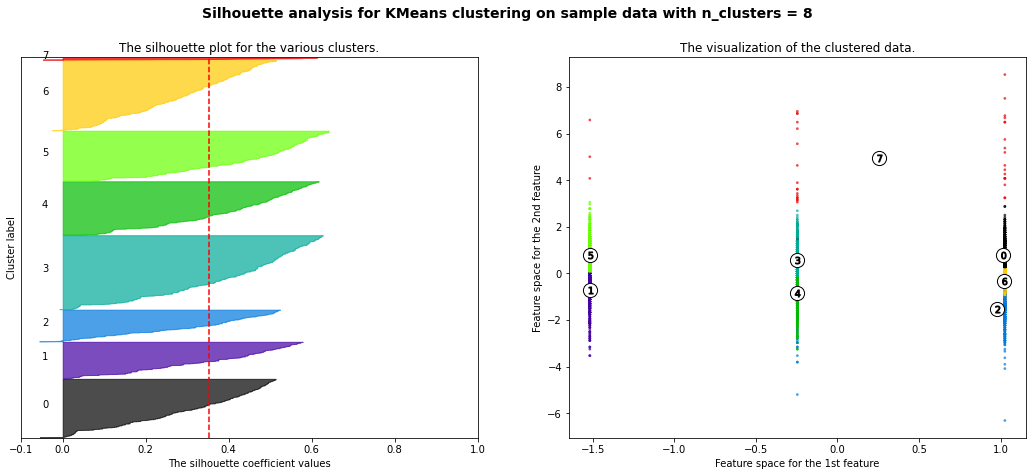

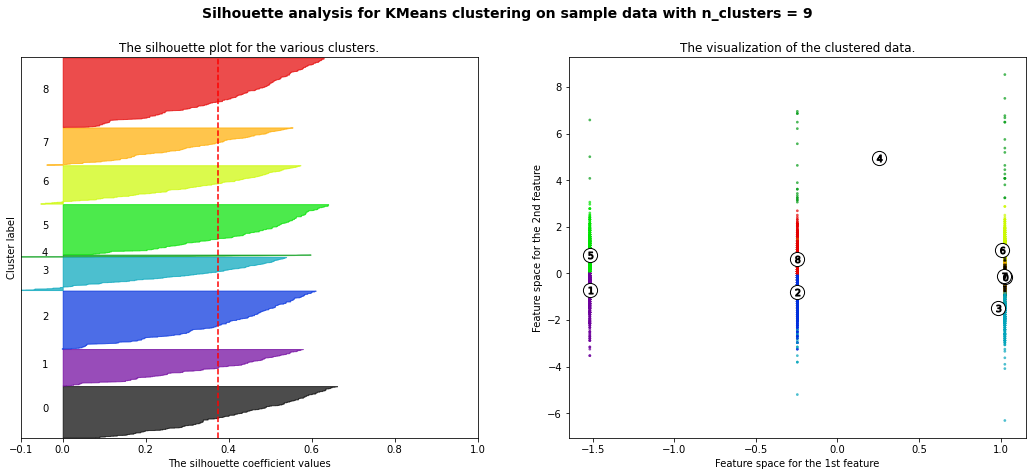

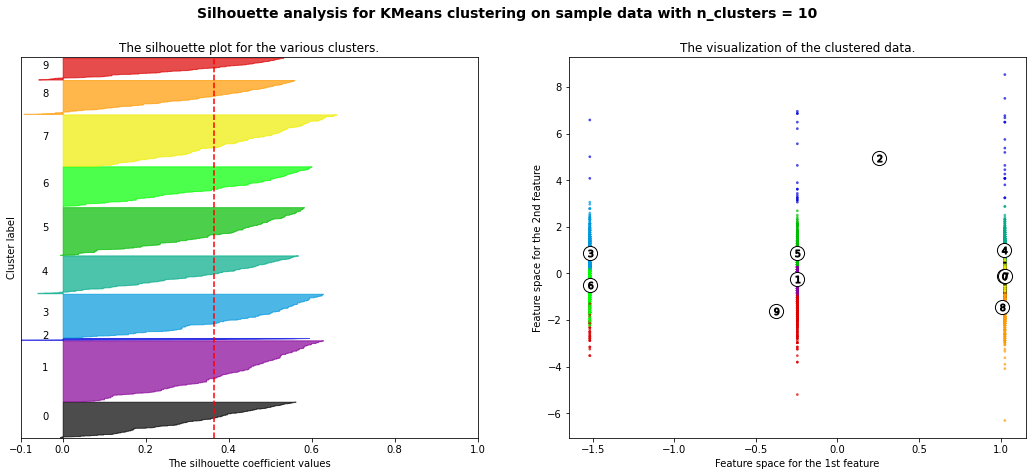

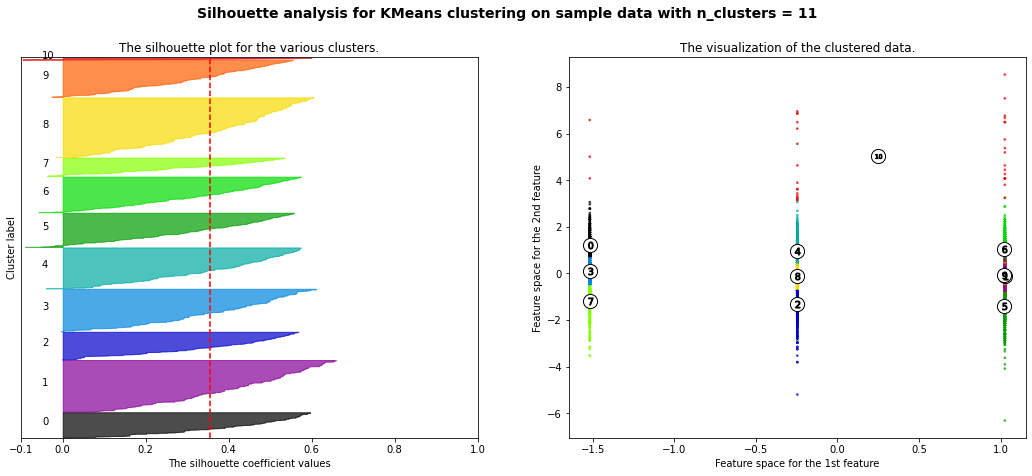

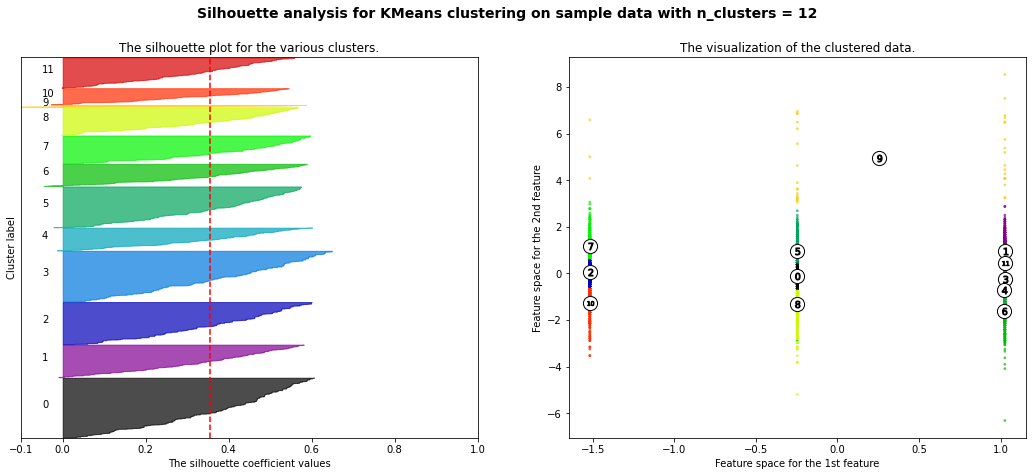

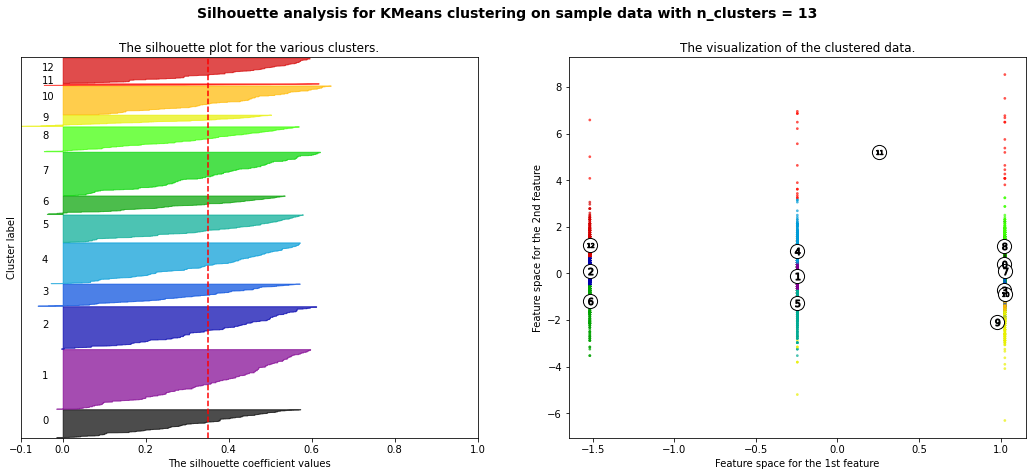

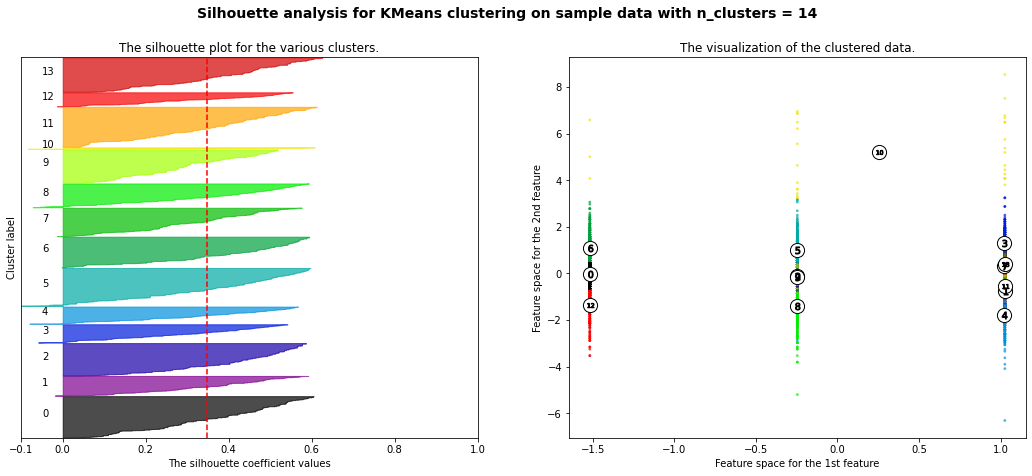

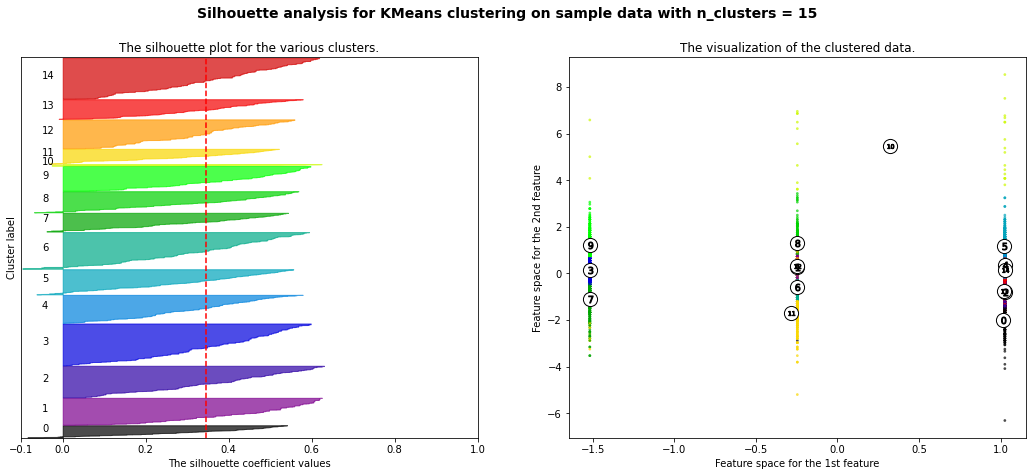

In [104]:
#range_n_clusters = [2, 3, 4, 5, 6]
range_n_clusters = list(range(2,16))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    no_cluster_silhouette_score[n_clusters] = round(silhouette_avg,3)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [105]:
from prettytable import PrettyTable

In [106]:
columns = ['n_clusters','silhouette_score']                                #column_names 
myTable = PrettyTable()                                                    #creating object
myTable.add_column(columns[0],list(no_cluster_silhouette_score.keys()))    #n_clusters
myTable.add_column(columns[1],list(no_cluster_silhouette_score.values()))  #silhouette score
print(myTable)

+------------+------------------+
| n_clusters | silhouette_score |
+------------+------------------+
|     2      |      0.428       |
|     3      |      0.383       |
|     4      |      0.374       |
|     5      |      0.372       |
|     6      |      0.368       |
|     7      |      0.376       |
|     8      |      0.353       |
|     9      |      0.374       |
|     10     |      0.365       |
|     11     |      0.356       |
|     12     |      0.355       |
|     13     |      0.351       |
|     14     |      0.348       |
|     15     |      0.344       |
+------------+------------------+


Elbow Method

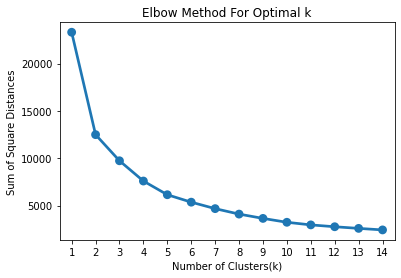

In [107]:
#Elbow Method For Optimal k
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

So we can use 3 clusters

Dendogram

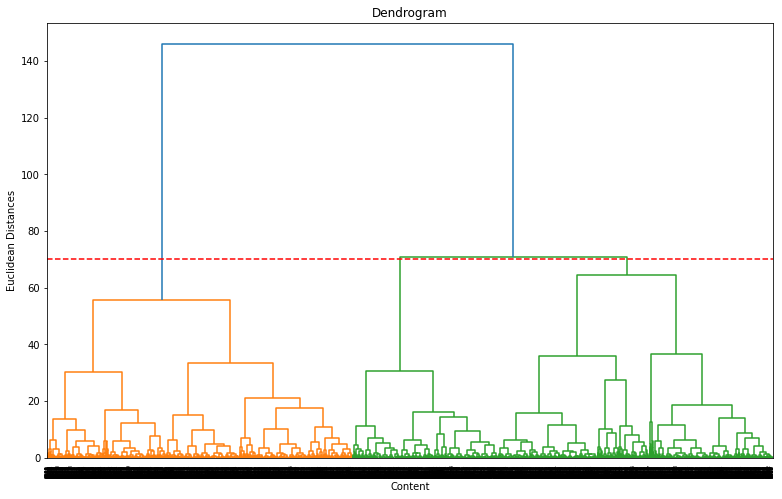

In [108]:
# Let's import sch
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.axhline(y=70,color='r', linestyle='--')
plt.show()   

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold

No. of Cluster = 3

AgglomerativeClustering

In [109]:
# Let's  import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

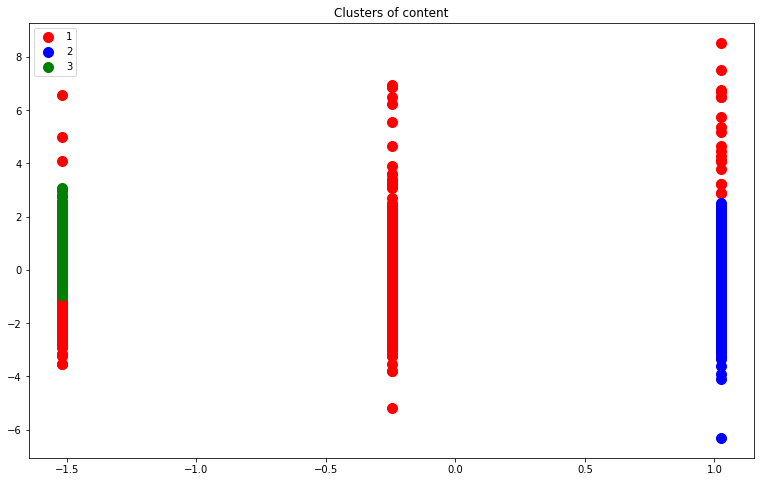

In [110]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')

plt.title('Clusters of content')

plt.legend()
plt.show()

In [111]:
np.unique(y_hc,return_counts=True)

(array([0, 1, 2]), array([2937, 3275, 1558]))

Conclusion
When we look at the dataset we can clearly see that out of all the given titles 69.1% of them were movies and the rest 30.9% were TV Shows.

We have reached a conclusion from our analysis from the content added over years that Netflix is more focusing on movies than TV Shows and We see a slow start for Netflix over several years things begin to pick up in 2015 and then there is a rapid increase from 2016.

We also observe that from release_year(Actual Releaseyear of the movie / show) that more number of Movies release than TV Shows.

The most prolific producers of content for Netflix are primarily, the USA, with India and the UK a significant distance behind.

As I've noted in the insights on the plot, it is really interesting to see how the split of TV Shows and Movies varies by country. South Korea and Japan is dominated by TV Shows and Equally, India is dominated by Movies.

We observe that some ratings are only applicable to Movies and the most common for both Movies & TV Shows are TV-MA(For Mature Audiences) and TV-14(May be unsuitable for children under 14 ).

We observe that mostly content available on netflix are Adults and Young Adults age group for both Movies and TV Shows.Very less contents for kids age group.

It is also interesting to see parallels between culturally comparable nations - the USA and UK are closely aligned with their Netflix target ages, but radically different from,India or Japan. Also, Mexico and Spain have similar content on Netflix for different age groups.

The end & beginnings of each year seem to be Netflix's preference for adding content.December has the highest number of contents followed by october and january reason could be December is the holiday season and it also has Christmas, so there is high possibility that most of the contents upload in this month and February is the worst.

Looking at the Genres we can see that Drama is the most popular genre followed by comedy.

When we look at the cast for Movies we can see many Indian actors like Anupam Kher,Shah Rukh Khan,Naseeruddin Shah, OM Puri have the most number of films on Netflix.

From the histogram plot, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes which seems to make sense. Most content are about 70 to 120 min duration for movies and Netflix TV shows on the other hand seems to be heavily skewed to the right or positively skewed where the majority of shows only have 1 season.

Looking at the directors who directed the most number of TV Shows/Movies are Raul Campos and Jan Sulter collectively have the most content on Netflix.

Looking at the Netflix titles we observe that It seems like words like "Love", "Man", "World", "Story" , "Christmas" are very common in titles.

In text analysis (NLP) I removed stop words, removed punctuations , stemming & TF-IDF vectorizer and other functions of NLP.

By applying different clustering models like Kmeans,Agglomerative clustering on dataset we got the best cluster arrangements i.e optimal number of cluster is equal to 3.